# Proyecto 2
## Data Science
Gerardo Méndez - 18239<br>
Douglas de León - 18037<br>
Rodrigo Garoz - 18102<br>
José Miguel Castañeda - 18161<br>

### Imports

Librerías necesarias para trabajo

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

from pandas_profiling import ProfileReport
from quickda.clean_data import *
from quickda.explore_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_time_series import *
from quickda.explore_numeric_categoric import *
from autoplotter import run_app

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

Se carga el dataset desde el archivo CSV

In [3]:
data = pd.read_csv("./data/UCI_Credit_Card.csv")

### Dataset exploration

Exploración de los datos. Se muestran los tipos de variables, e información de las variables numéricas.

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Null count

Se revisan la cantidad de casillas null por columna dentro del dataset:

In [7]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Como se puede ver no hay ningún dato faltante en la data

### Profile report

Buscamos insights acerca del comportamiento y composición de las variables disponibles

In [7]:
report = ProfileReport(data, title="Incumplimiento de pago de tarjeta de crédito", explorative=True)
report.to_file("./reports/reporte.html")

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Cleaning de datos

#### Estandarización de variables

In [8]:
standardize_data = clean(data, method='standardize')
clean_data = standardize_data

In [9]:
clean_data

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [10]:
clean_data['marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

In [11]:
clean_data['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [12]:
clean_data['sex'].value_counts()

2    18112
1    11888
Name: sex, dtype: int64

#### Rename

Renombramos ciertos campos para hacer más comprensivos los datos que contienen

Se cambia el nombre de la columna "pay_0" a "pay_1" para que coincida el número con las demás columnas:

In [13]:
clean_data = clean_data.rename(columns={'pay_0': 'pay_1'})

Se cambia el nombre de la columna "default.payment.next.month" a "default_payment_next_month" para estandarizar el nombre de la columna:

In [14]:
clean_data = clean_data.rename(columns={'default.payment.next.month': 'default_payment_next_month'})

#### Variables categóricas

In [15]:
for col in ['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']:
    clean_data[col] = clean_data[col].astype('category')

### Autoplotter

In [17]:
run_app(clean_data, mode="external", host="127.0.0.1", port=5000)

AutoPlotter is running on http://127.0.0.1:5000/


c:\users\pecos\appdata\local\programs\python\python37\lib\site-packages\autoplotter\jupyter_dash\jupyter_app.py:118: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



### Variables dummy

#### Pay features

In [18]:
dummies = pd.get_dummies(clean_data['pay_1'], drop_first=True, prefix='pay_1')
clean_data = pd.concat([clean_data, dummies], axis=1)
clean_data = clean_data.drop('pay_1', axis=1)

In [19]:
dummies = pd.get_dummies(clean_data['pay_2'], drop_first=True, prefix='pay_2')
clean_data = pd.concat([clean_data, dummies], axis=1)
clean_data = clean_data.drop('pay_2', axis=1)

In [20]:
dummies = pd.get_dummies(clean_data['pay_3'], drop_first=True, prefix='pay_3')
clean_data = pd.concat([clean_data, dummies], axis=1)
clean_data = clean_data.drop('pay_3', axis=1)

In [21]:
dummies = pd.get_dummies(clean_data['pay_4'], drop_first=True, prefix='pay_4')
clean_data = pd.concat([clean_data, dummies], axis=1)
clean_data = clean_data.drop('pay_4', axis=1)

In [22]:
dummies = pd.get_dummies(clean_data['pay_5'], drop_first=True, prefix='pay_5')
clean_data = pd.concat([clean_data, dummies], axis=1)
clean_data = clean_data.drop('pay_5', axis=1)

In [23]:
dummies = pd.get_dummies(clean_data['pay_6'], drop_first=True, prefix='pay_6')
clean_data = pd.concat([clean_data, dummies], axis=1)
clean_data = clean_data.drop('pay_6', axis=1)

#### Sex features

In [24]:
dummies = pd.get_dummies(clean_data['sex'], drop_first=True, prefix='sex')
clean_data = pd.concat([clean_data, dummies], axis=1)
clean_data = clean_data.drop('sex', axis=1)

clean_data = clean_data.rename(columns={'sex_2': 'female'})

#### Education feature

In [25]:
clean_data['education'][clean_data['education']==5] = 4
clean_data['education'][clean_data['education']==6] = 4

clean_data['education'].value_counts()

2    14030
1    10585
3     4917
4      454
0       14
5        0
6        0
Name: education, dtype: int64

In [26]:
dummies = pd.get_dummies(clean_data['education'], drop_first=True, prefix='education')
clean_data = pd.concat([clean_data, dummies], axis=1)
clean_data = clean_data.drop('education', axis=1)

#### Marriage feature

In [27]:
clean_data['marriage'][clean_data['marriage']==0] = 3

dummies = pd.get_dummies(clean_data['marriage'], drop_first=True, prefix='marriage')
clean_data = pd.concat([clean_data, dummies], axis=1)
clean_data = clean_data.drop('marriage', axis=1)

Revisamos el dataset limpio

In [28]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          30000 non-null  int64   
 1   limit_bal                   30000 non-null  float64 
 2   age                         30000 non-null  int64   
 3   bill_amt1                   30000 non-null  float64 
 4   bill_amt2                   30000 non-null  float64 
 5   bill_amt3                   30000 non-null  float64 
 6   bill_amt4                   30000 non-null  float64 
 7   bill_amt5                   30000 non-null  float64 
 8   bill_amt6                   30000 non-null  float64 
 9   pay_amt1                    30000 non-null  float64 
 10  pay_amt2                    30000 non-null  float64 
 11  pay_amt3                    30000 non-null  float64 
 12  pay_amt4                    30000 non-null  float64 
 13  pay_amt5        

### Relevancia de features

Feature Importance in the prediction of default_payment_next_month


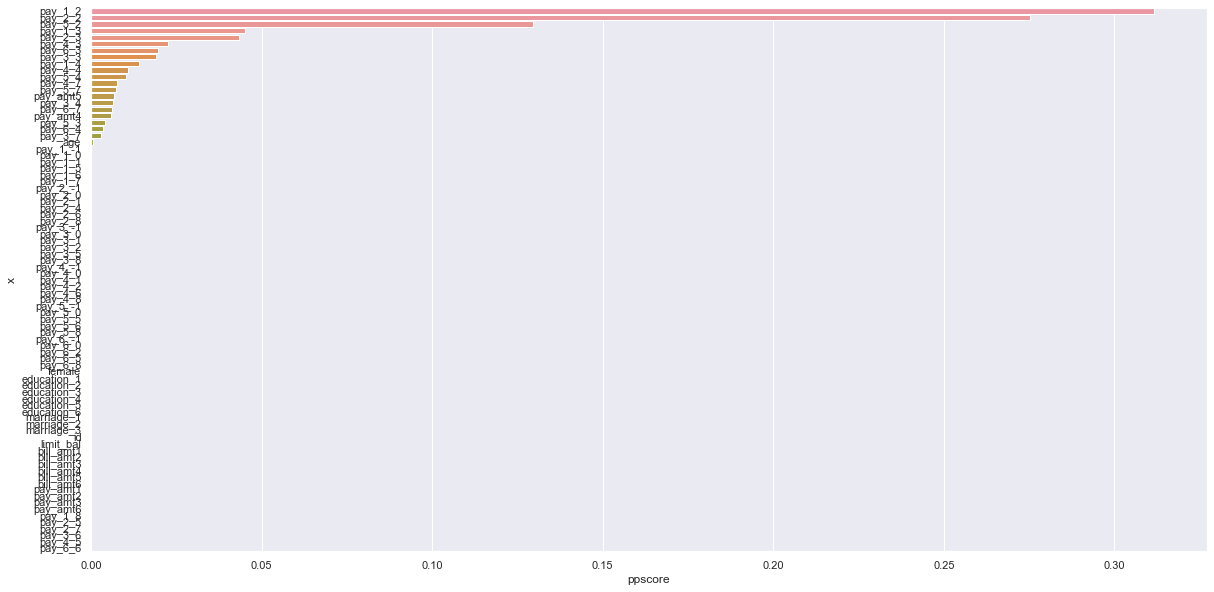

In [29]:
eda_numcat(clean_data, method='pps', x='default_payment_next_month')

Descubrimos que las variables más importantes en la predicción del default son las variables pay_ y pay_amt, y la edad y el sexo (aunque en menor magnitud)

### Gráficas sobre datos demográficos de las columnas:

In [30]:
px.bar(clean_data[['education_1', 'education_2', 'education_3', 'education_4','education_5','education_6']].groupby(
        clean_data['female']).mean().set_index(pd.Index(['Hombre', 'Mujer'])),
        title="Sexo - Educación",
        labels={
            'value': 'Promedio',
            'index': 'Sexo'
    })

In [31]:
px.bar(clean_data[['marriage_1', 'marriage_2', 'marriage_3']].groupby(
        clean_data['female']).mean().set_index(pd.Index(['Hombre', 'Mujer'])),
        title="Sexo - Estado Civil",
        labels={
            'value': 'Promedio',
            'index': 'Sexo'
    })

In [32]:
px.bar(clean_data[['default_payment_next_month']].groupby(
        clean_data['female']).count().set_index(pd.Index(['Hombre', 'Mujer'])),
        title="Sexo - Pagó al mes siguiente",
        labels={
            'value': 'Cantidad',
            'index': 'Sexo'
    })

In [33]:
px.bar(standardize_data[['default.payment.next.month']].groupby(
        standardize_data['education']).mean().set_index(
        pd.Index(['otros','estudios de posgrado', 'universidad', 'bachillerato', 'otros', 'otros', 'otros'])),
        title="Educación - Pagó al mes siguiente",
        labels={
            'value': 'Promedio',
            'index': 'Educación'
    })

In [34]:
px.bar(standardize_data[['default.payment.next.month']].groupby(
        standardize_data['marriage']).mean().set_index(
        pd.Index(['Otros','Casado','Soltero', 'Otros'])),
        title="Estado Civil - Pagó al mes siguiente",
        labels={
            'value': 'Promedio',
            'index': 'Estado Civil'
    })

In [35]:
px.histogram(clean_data,
        x='limit_bal', y=['default_payment_next_month'],
        title="Cantidad del crédito - Pagó al mes siguiente",
        labels={
            'value': 'Pagó al mes siguiente',
            'limit_bal': 'Cantidad del crédito otorgado en dólares NT'
    })

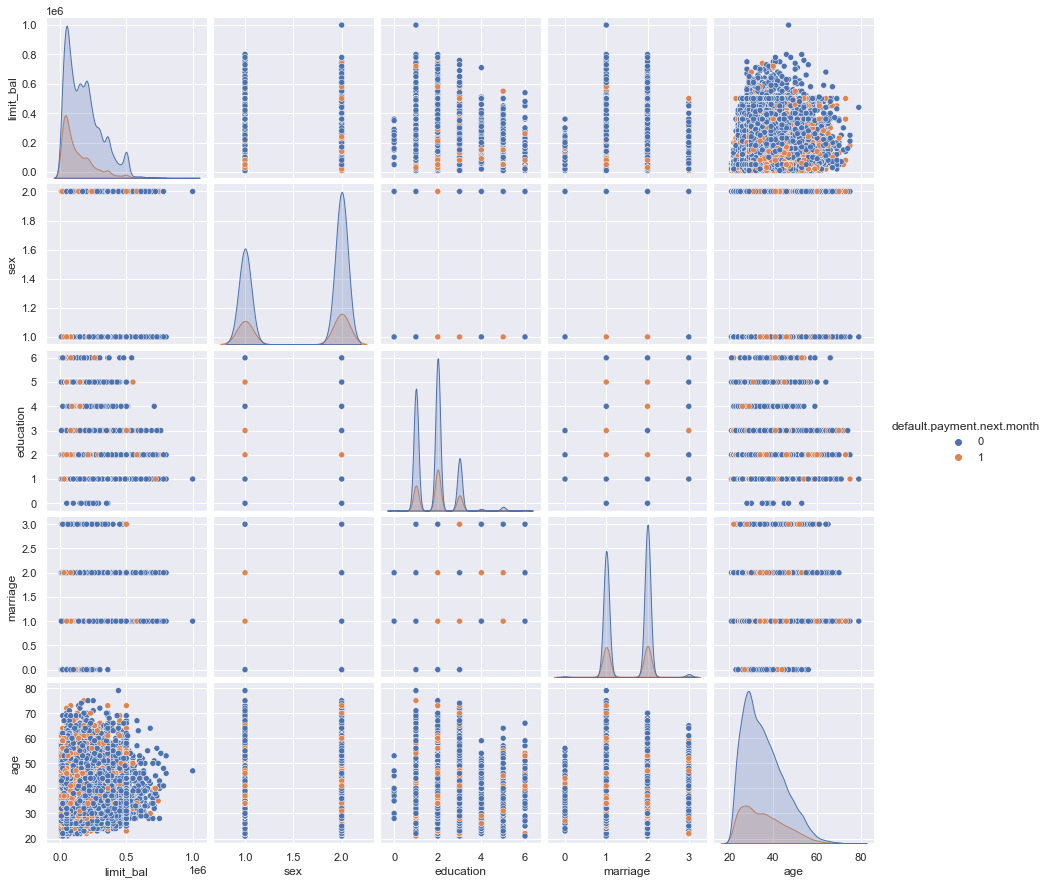

In [36]:
sns.pairplot(standardize_data[[
'default.payment.next.month',
'limit_bal',
'sex',  
'education',  
'marriage',  
'age'
]], hue="default.payment.next.month")

### Clean dataset profile report

Se visualiza otra vez el reporte general de todo el dataset:

In [22]:
report = ProfileReport(clean_data, title="Incumplimiento de pago de tarjeta de crédito (Limpio)", explorative=True)
report.to_file("./reports/reporte_limpio.html")

Summarize dataset:   0%|          | 0/45 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
clean_data.to_csv("./data/clean_data.csv")

EOF